<a href="https://colab.research.google.com/github/mjavadpur/Regression/blob/main/RegSession4MJavadpurHeartFDetec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#####
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
#####
from sklearn.neighbors import LocalOutlierFactor
#####
from sklearn import metrics
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report ,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "DEATH_EVENT" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

**Import**  **dataset**

In [10]:
df = pd.read_csv('/content/drive/MyDrive/Workshop/Regression/BreastCancer/heart_failure_clinical_records_dataset.csv')
df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [11]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [12]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [14]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [15]:
df.shape

(299, 13)

# Check missing values

In [16]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Correlation plot

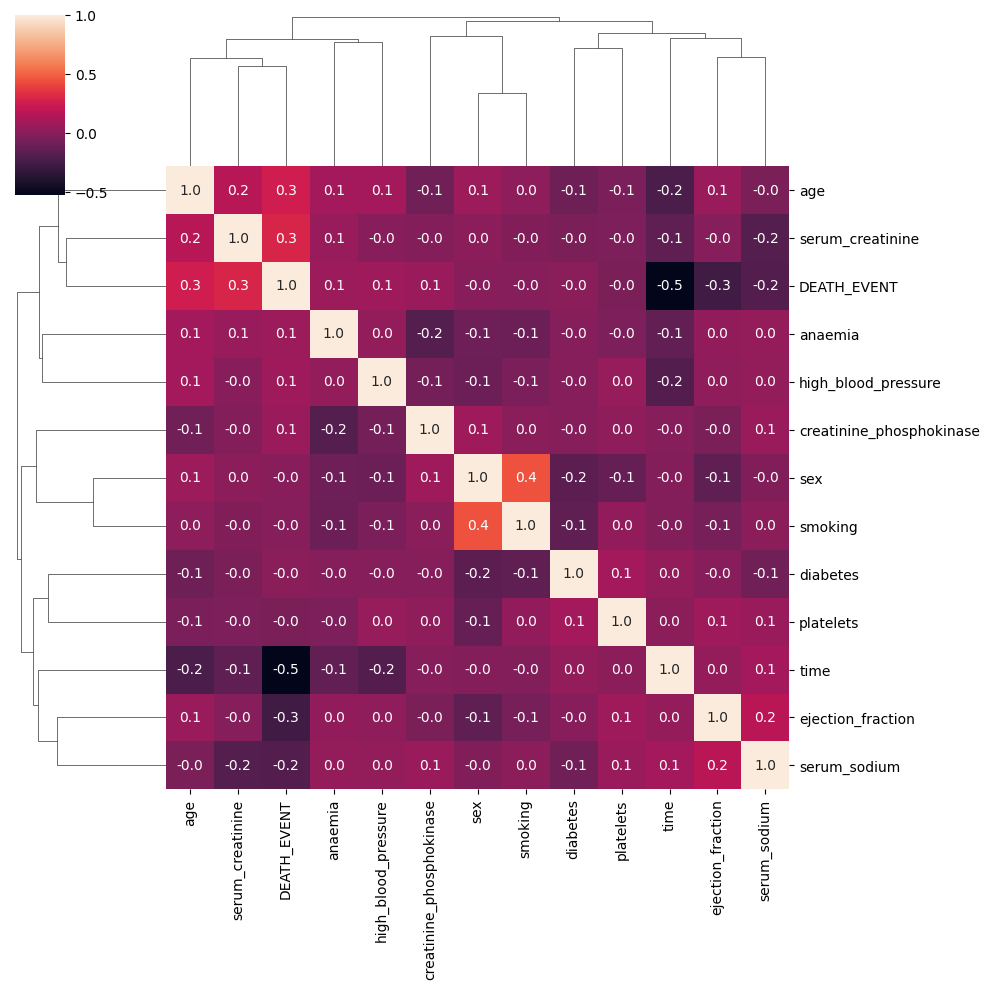

In [17]:
sns.clustermap(df.corr() , annot=True , fmt='.1f')

# KDE plot
We use this plot to examine the distribution of the data

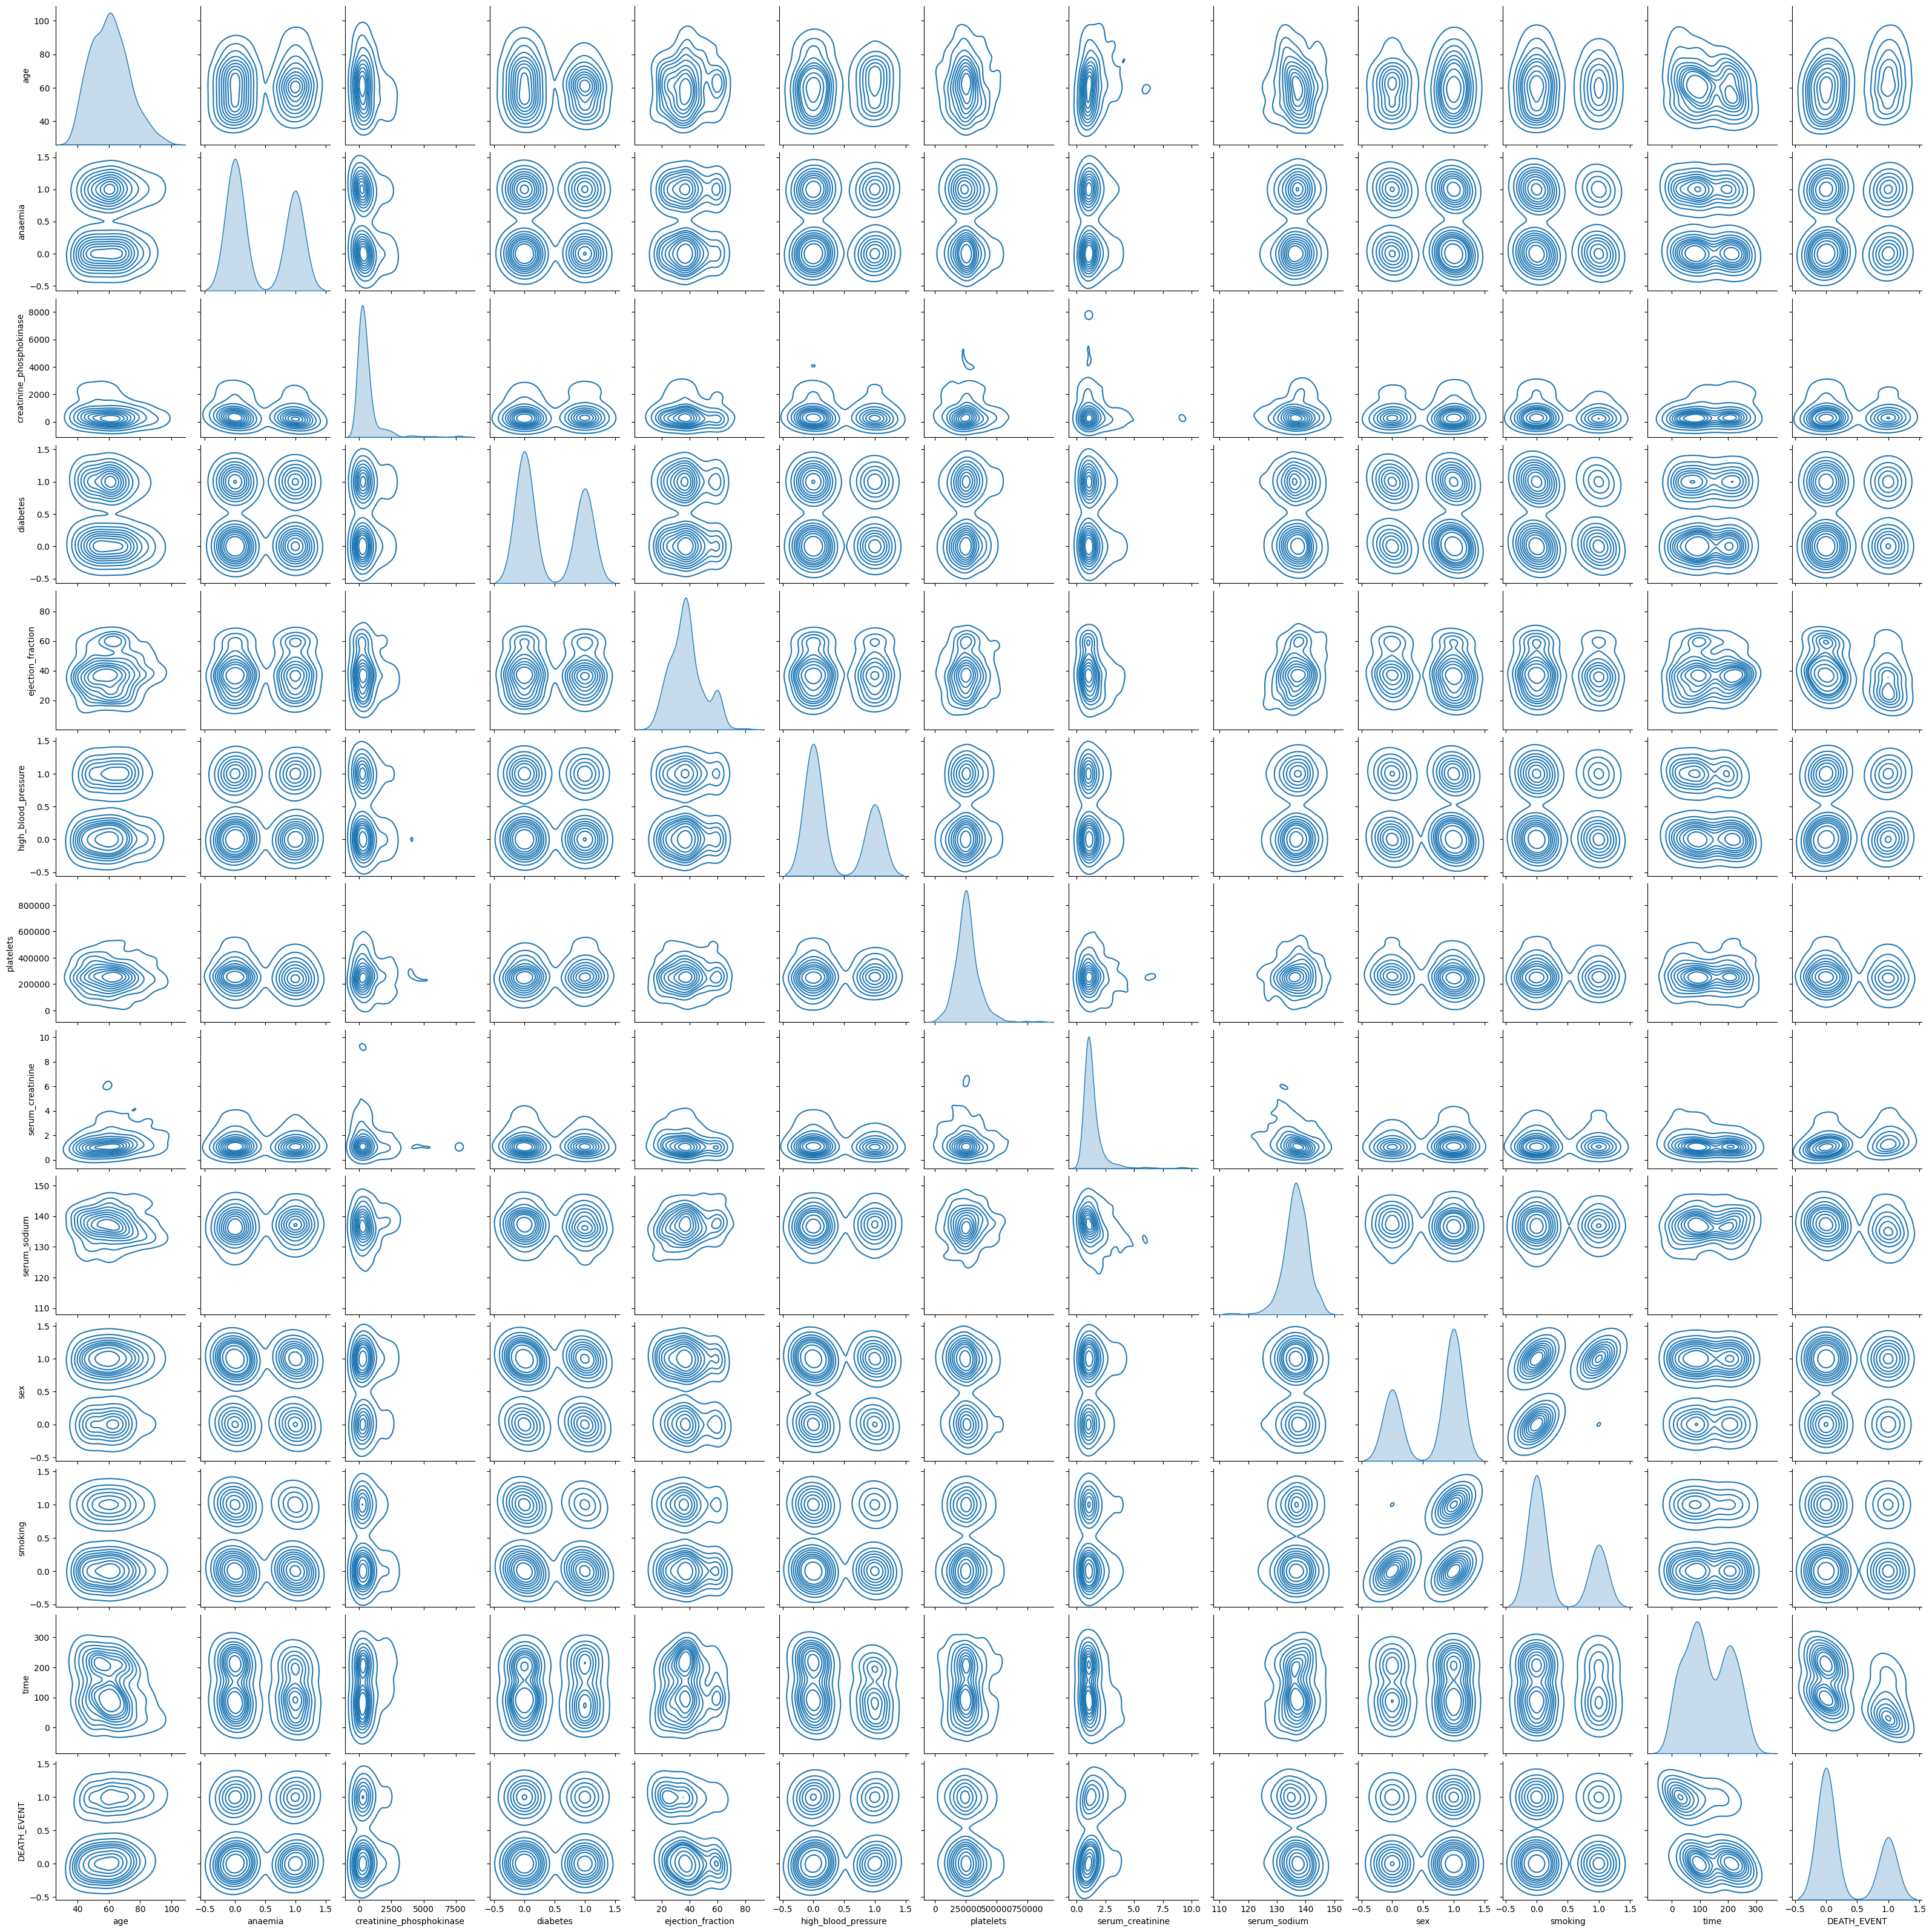

In [7]:
sns.pairplot(df , kind="kde")

# Boxplot

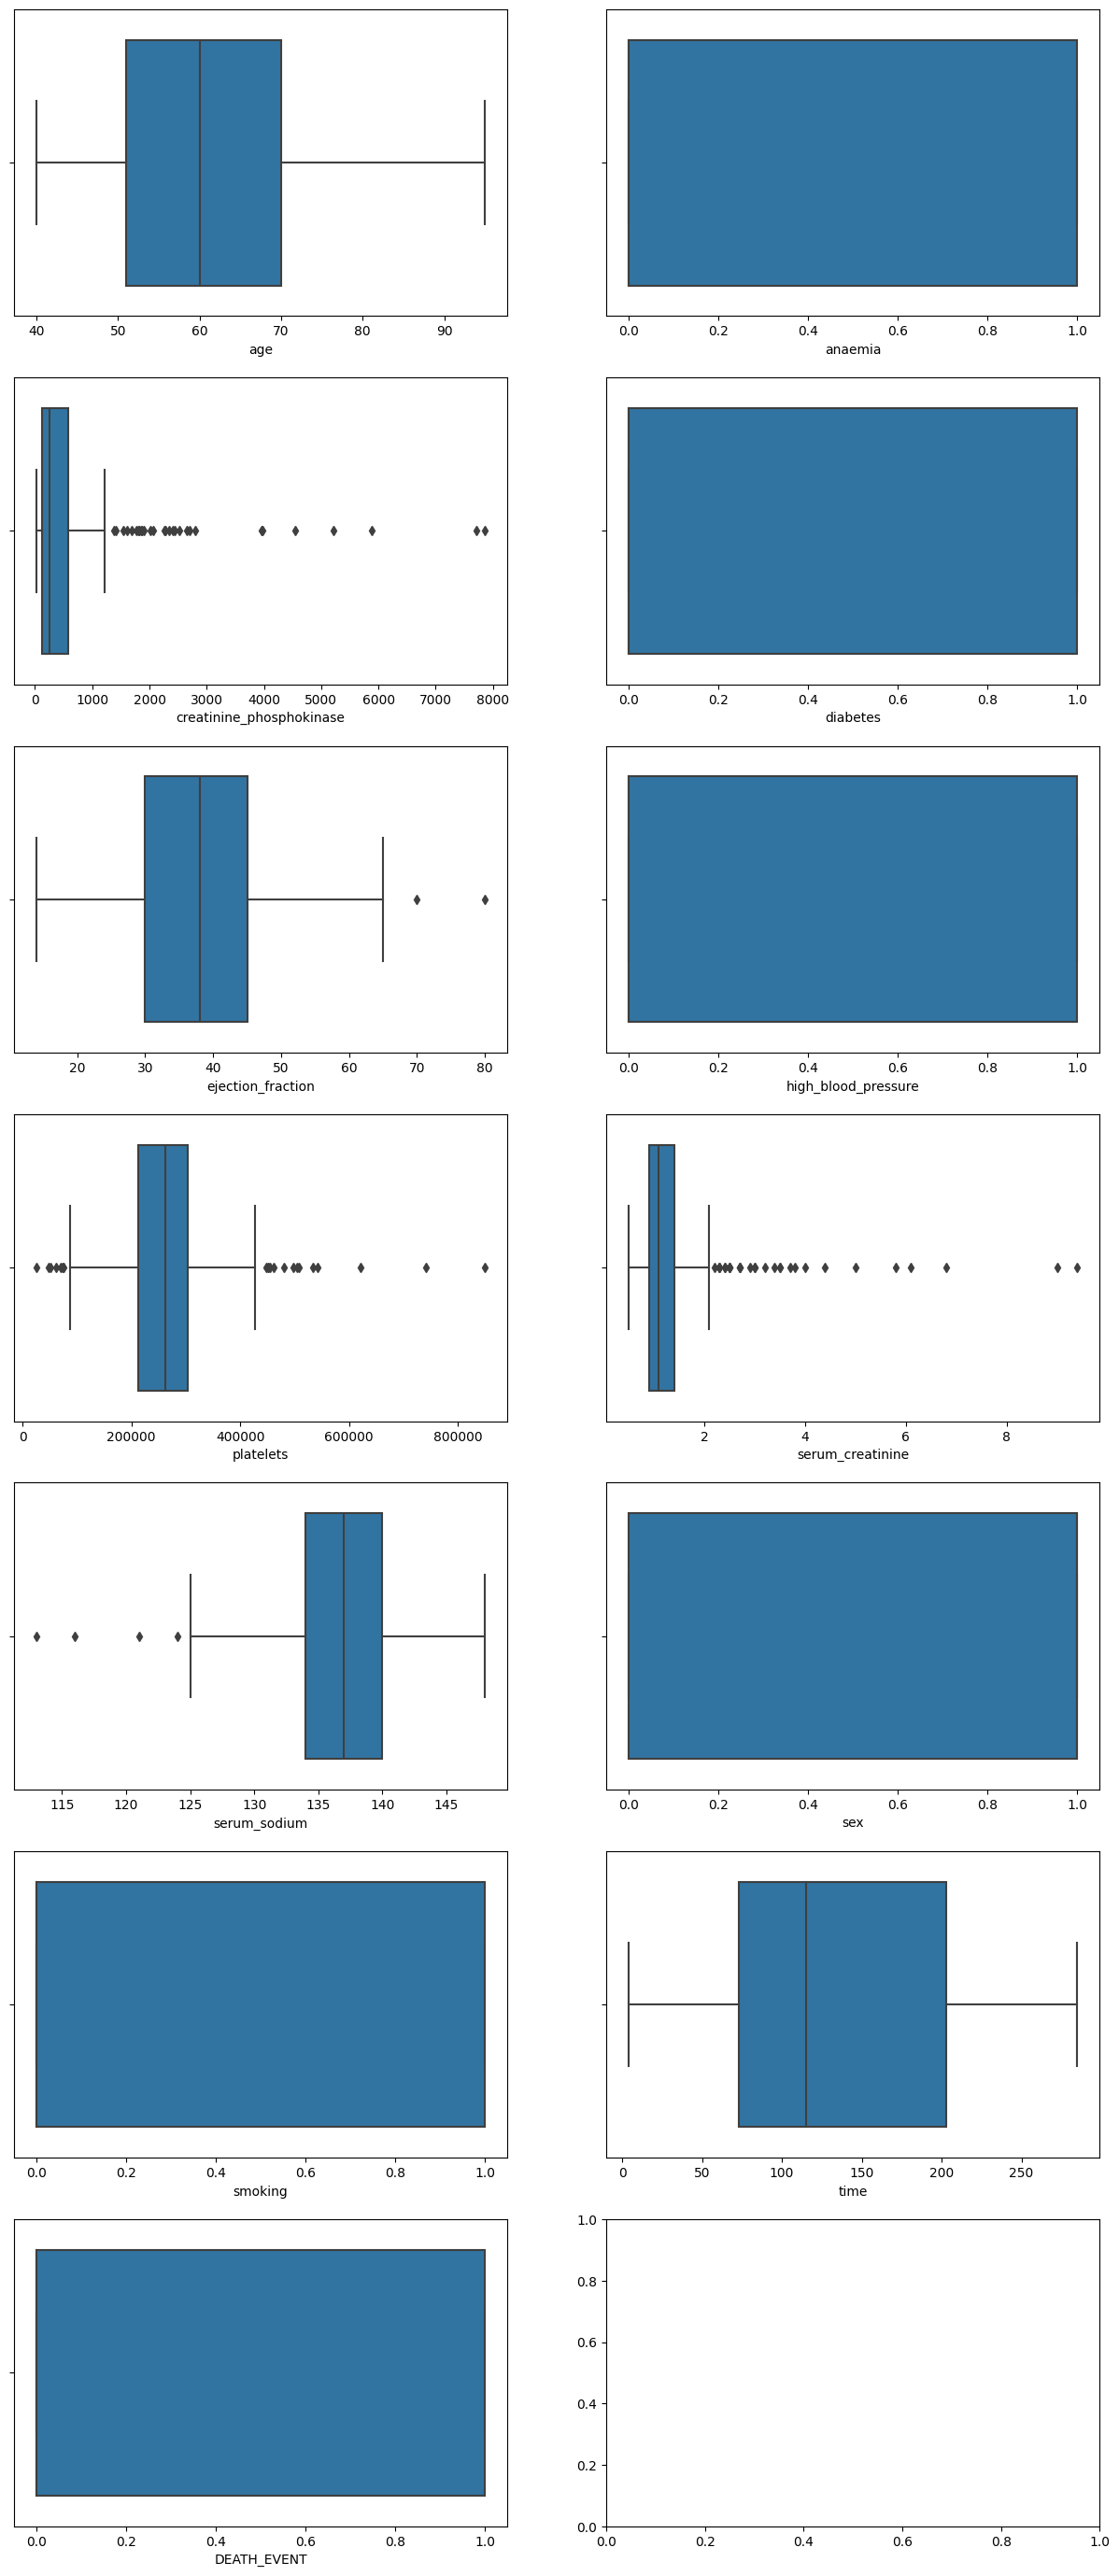

In [18]:
features = df.drop('DEATH_EVENT',axis=1)
features = df.columns.tolist()

fig , ax = plt.subplots(nrows= int(np.ceil(len(features)/2)) , ncols=2 , figsize=(15,35))

for i , var in enumerate(features):
    x = i//2
    y = i%2
    sns.boxplot(data=df , x=var , ax=ax[x,y])

# Noise detecting

In [35]:
lof = LocalOutlierFactor(n_neighbors=5)
df['lof_score'] = lof.fit_predict(df[features])
outliers = df[df['lof_score'] == -1]

print(f"Found {len(outliers)} outliers at indices {outliers.index.tolist()}")

df.drop('lof_score' , axis=1 , inplace=True) #Returning the data frame to the previous state

Found 35 outliers at indices [1, 8, 16, 38, 45, 48, 52, 72, 103, 105, 106, 109, 132, 134, 140, 153, 157, 171, 176, 191, 192, 197, 199, 227, 238, 239, 244, 254, 259, 266, 277, 283, 288, 296, 297]


# Make prediction model 

## Apart the train and test data

In [44]:
def find_best_lasso_model(X_train , y_train, X_test, y_test):
    from tqdm.contrib import itertools

    hyperParams = pd.DataFrame({"alpha":[],"accuracy_score":[]})

    for i in itertools.product(range(1000)):
        alpha = i[0]/1000
        LR = Lasso(alpha = alpha)
        LR.fit(X_train , y_train)

        y_pred = LR.predict(X_test)
        y_pred = (y_pred > 0.5).astype(int) #Define threshold to return discrete values
        accuracy_score = metrics.accuracy_score(y_test , y_pred)

        new_hp = pd.DataFrame({"alpha":[alpha],"accuracy_score":[accuracy_score]})

        hyperParams = hyperParams.append(new_hp)

    result = hyperParams['accuracy_score'].values
    best_HP = hyperParams.iloc[result.argmax(),:]

    best_alpha = best_HP['alpha']
    best_accuracy_score = best_HP['accuracy_score']
    
    LR = Lasso(alpha = best_alpha)
    LR.fit(X_train , y_train)
    y_pred = LR.predict(X_test)
    y_pred = (y_pred > 0.5).astype(int) #Define threshold to return discrete values
        

    return LR, best_alpha, best_accuracy_score, y_pred

In [48]:
def my_model(df):
    #Features
    x = df.drop('DEATH_EVENT',axis=1)
    #DEATH_EVENT
    y = df['DEATH_EVENT']
    #Prepare the train data and test data and the size for testing
    X_train , X_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=0)

    print('X_train shape : ' , X_train.shape)
    print('X_test shape : ' , X_test.shape)
    print('y_train shape : ' , y_train.shape)
    print('y_test shape : ' , y_test.shape , '\n')

    print('X_train info' , X_train.info() , '\n')
    print('X_train info' , X_test.info())

    LR, alpha, accuracy_score, y_pred = find_best_lasso_model(X_train , y_train, X_test, y_test)

    #accuracy score
    # y_pred = LR.predict(X_test)
    # y_pred = (y_pred > 0.5).astype(int) #Define threshold to return discrete values
    # accuracy_score = metrics.accuracy_score(y_test , y_pred)
    print('best accuracy score : ' , accuracy_score)
    print('best alpha : ' , alpha)

    #cross val score
    KF = KFold(n_splits=5 , shuffle=True , random_state=0)
    CVS = cross_val_score(LR , X_test, y_pred , cv=KF)
    print('Cross val score : ' , CVS)

    #report
    print(classification_report(y_test,y_pred))

    #Confusion matrix
    print('Confusion matrix : ')
    print(metrics.confusion_matrix(y_test,y_pred))

In [49]:
my_model(df)

X_train shape :  (239, 12)
X_test shape :  (60, 12)
y_train shape :  (239,)
y_test shape :  (60,) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 134 to 172
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       239 non-null    float64
 1   anaemia                   239 non-null    int64  
 2   creatinine_phosphokinase  239 non-null    int64  
 3   diabetes                  239 non-null    int64  
 4   ejection_fraction         239 non-null    int64  
 5   high_blood_pressure       239 non-null    int64  
 6   platelets                 239 non-null    float64
 7   serum_creatinine          239 non-null    float64
 8   serum_sodium              239 non-null    int64  
 9   sex                       239 non-null    int64  
 10  smoking                   239 non-null    int64  
 11  time                      239 non-null    int64  
dtypes: float64(3), int

  0%|          | 0/1000 [00:00<?, ?it/s]

best accuracy score :  0.8333333333333334
best alpha :  0.857
Cross val score :  [0.2934827  0.41740023 0.53487672 0.48430828 0.4504174 ]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        37
           1       0.93      0.61      0.74        23

    accuracy                           0.83        60
   macro avg       0.87      0.79      0.81        60
weighted avg       0.85      0.83      0.82        60

Confusion matrix : 
[[36  1]
 [ 9 14]]


In [50]:
print('Detected OUTLIERS count: ' , str(len(outliers)))

df_drop_outliers = df.drop(outliers.index,axis = 0)
my_model(df_drop_outliers)

Detected OUTLIERS count:  35
X_train shape :  (211, 12)
X_test shape :  (53, 12)
y_train shape :  (211,)
y_test shape :  (53,) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 298 to 193
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       211 non-null    float64
 1   anaemia                   211 non-null    int64  
 2   creatinine_phosphokinase  211 non-null    int64  
 3   diabetes                  211 non-null    int64  
 4   ejection_fraction         211 non-null    int64  
 5   high_blood_pressure       211 non-null    int64  
 6   platelets                 211 non-null    float64
 7   serum_creatinine          211 non-null    float64
 8   serum_sodium              211 non-null    int64  
 9   sex                       211 non-null    int64  
 10  smoking                   211 non-null    int64  
 11  time                      211 non-null    in

  0%|          | 0/1000 [00:00<?, ?it/s]

best accuracy score :  0.9056603773584906
best alpha :  0.012
Cross val score :  [0.38253402 0.4537572  0.53410458 0.44468225 0.7118638 ]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        40
           1       0.83      0.77      0.80        13

    accuracy                           0.91        53
   macro avg       0.88      0.86      0.87        53
weighted avg       0.90      0.91      0.90        53

Confusion matrix : 
[[38  2]
 [ 3 10]]
